<a href="https://colab.research.google.com/github/NicoEssi/Uncategorized_Code/blob/master/WhyDoesThisNotWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
## Import Dependencies
import pylab
import os
import math
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import random
from random import seed
from random import randint
from decimal import Decimal
from collections import Counter

In [10]:
def valid_dir(visited_locations, current_location):
  validdir = True
  for visited_location in visited_locations:
    #print(str(visited_location) + ' == ' + str(current_location) + ' : ' + str(visited_location != current_location)) #debug
    if visited_location == current_location:
      validdir = False
  return validdir

In [26]:
# Parameters
n = 1000 # Number of runs
N = 100 # Number of steps
# =====================
rList = [] # Recorded end positions for each run
rNumber = [] # Number of runs taken
Steps = [] # Number of steps taken during each run
Finished = 0 # debugging purposes; how many full steps were taken
# =====================

In [27]:
for r in range(n):
  # Initialize placeholders
  prev = None
  moved = False #Unused in biased walk
  visited = []
  steps_taken = 0

  # Starting position
  posx = 0
  posy = 0
  visited.append([posx, posy])

  # Execute all steps within the run
  for R in range(N):
    dead_directions = []
    collision = False

    while True:
      value = random.randint(0,3) # Random step in x or y direction

      # Check for positive x-direction
      if value == 0 and prev != 1 and value not in dead_directions:
        if valid_dir(visited, [posx+1, posy]):
          # update our values
          posx += 1
          visited.append([posx, posy])
          break
        else:
          dead_directions.append(value)

      elif value == 1 and prev != 0 and value not in dead_directions:
        if valid_dir(visited, [posx-1, posy]):
          # update our values
          posx -= 1
          visited.append([posx, posy])
          break
        else:
          dead_directions.append(value)

      elif value == 2 and prev != 3 and value not in dead_directions:
        if valid_dir(visited, [posx, posy+1]):
          # update our values
          posy += 1
          visited.append([posx, posy])
        else:
          dead_directions.append(value)

      elif value == 3 and prev != 2 and value not in dead_directions:
        if valid_dir(visited, [posx, posy-1]):
          # update our values
          posy -= 1
          visited.append([posx, posy])
        else:
          dead_directions.append(value)

      if len(dead_directions) == 3:
        collision = True

      steps_taken += 1

  Steps.append(steps_taken)
  Rval = np.sum(np.array([posx, posy]) ** 2)
  rList.append(Rval)

KeyboardInterrupt: ignored

In [28]:
visited

[[0, 0],
 [0, -1],
 [0, -2],
 [-1, -2],
 [-1, -1],
 [-1, 0],
 [-1, 1],
 [-2, 1],
 [-3, 1],
 [-4, 1],
 [-4, 2],
 [-5, 2],
 [-5, 1],
 [-6, 1],
 [-6, 2],
 [-7, 2],
 [-7, 3],
 [-8, 3],
 [-8, 4],
 [-8, 5],
 [-8, 6],
 [-8, 7],
 [-8, 8],
 [-8, 9],
 [-8, 10],
 [-7, 10],
 [-7, 11],
 [-6, 11],
 [-6, 10],
 [-6, 9],
 [-5, 9],
 [-5, 8],
 [-5, 7],
 [-4, 7],
 [-3, 7],
 [-3, 8],
 [-3, 9],
 [-4, 9],
 [-4, 8]]

Mean steps taken: nan
Mean rVal computed: 10000.0
p-value: nan
This is c(N) 0
This is W 0.0
s = -inf


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


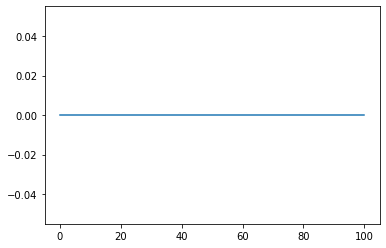

In [16]:
# Compute values
mean_n = np.mean(rNumber) # this is mean steps taken
mean_v = np.mean(rList) # this is mean Rval
p = np.log(mean_v)/np.log(mean_n) # this is p value

# Print values
print('Mean steps taken: ' + str(mean_n))
print('Mean rVal computed: ' + str(mean_v))
print('p-value: ' + str(p))

# Compute entropy
c = Counter(Steps)
print("This is c(N) " + str(c[N]))
w = c[N]/float(n)
print("This is W " + str(w))
d = 2 # change to dimensions

omg = w*((2*d)-1)**(N-2)
s = np.log(omg)/float(N-2)
print('s = ' + str(s))

# Compute and visualize distribution
xa = []
ya = []
for i in range(N+1):
  xa.append(i)
  ya.append(c[i])

fig = plt.figure()
plt.plot(xa, ya)
plt.show()